https://github.com/Berkmann18/facebook-friend-network
に従うことでfacebook friendsのcsv facebook.csvが生成される。
python codeはjupyterからだとうまく動作しなかったので、vs codeから推奨

In [1]:
library(ggnetwork)

Loading required package: ggplot2



In [2]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
library(readr)

In [4]:
df = read_tsv("two_column_df.tsv")

Warning message:
“Missing column names filled in: 'X1' [1]”
Parsed with column specification:
cols(
  X1 = col_double(),
  Source = col_character(),
  Target = col_character()
)



In [5]:
df %>% head

X1,Source,Target
<dbl>,<chr>,<chr>
0,yuko.shibata.775,atsu.hira.9
1,yuko.shibata.775,enomoto.kira
2,yuko.shibata.775,enomoto.niki
3,yuko.shibata.775,kanekohideshi.tyo
4,yuko.shibata.775,nanako37
5,yuko.shibata.775,nao.tsuchinaga


In [6]:
library(igraph)

Warning message:
“package ‘igraph’ was built under R version 3.6.3”

Attaching package: ‘igraph’


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [29]:
run_igraph = graph.data.frame(df %>% select(Source ,Target))

## nodeに媒介中心性(betweenness centrality)をアサイン

全てのvertex pair間の最短経路のいくつが自身を通るか


In [30]:
run_bet =  betweenness(run_igraph)

In [31]:
run_igraph = set_vertex_attr(run_igraph , "bet" , value = run_bet)

## nodeにpage rankをアサイン

In [32]:
run_page_rank = page_rank(run_igraph)

In [33]:
run_igraph = set_vertex_attr(run_igraph , "page_rank" , value = run_page_rank$vector)

## nodeにcluster_edge_betweennessをアサイン

https://yokkuns.hatenadiary.org/entry/20120819/1345380060

- 全てのvertex pair間の最短経路のいくつが自身（この場合edge）を通るか、がedge betweenness
- edge betweennessが最大のedgeから取り除いていく
- 全部取り除くところまで終了すると、デンドログラム（樹形図）ができる
- 下から順番にどこかの段階で止めることでコミュニティ分解できる
- どこで止めるかはmodularity Qという尺度がある模様
- igraphのcluster_edge_betweennessではmodularityに基づいてcommunityを決定するのがデフォルト（？）

In [34]:
run_comm = cluster_edge_betweenness(run_igraph)

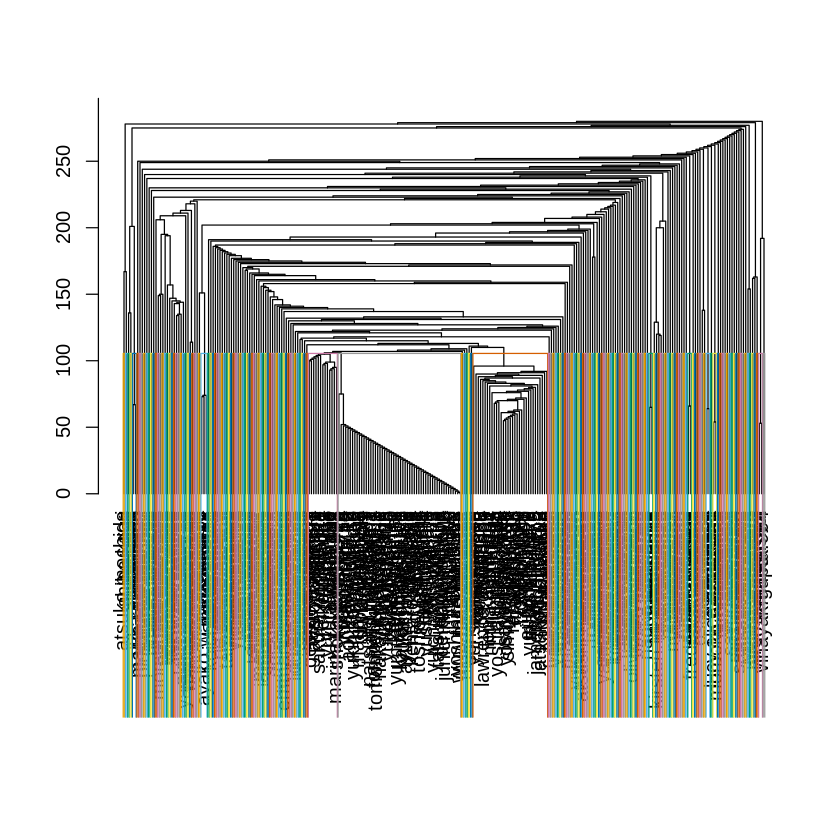

In [11]:
plot_dendrogram(run_comm)

In [12]:
class(run_comm)

[1] "communities"

In [35]:
run_mem = membership(run_comm)

In [36]:
run_igraph = set_vertex_attr(run_igraph , "comm" , value = run_mem)

### 違う設定をためしてみる（sandbox)

In [ ]:
run_comm_tmp = cluster_edge_betweenness(run_igraph , modularity = F , membership = F)

In [ ]:
class(run_comm_tmp)

In [ ]:
run_comm_tmp

## ggnetwork化

In [16]:
theme_set(theme_void())

In [17]:

options(repr.plot.width=14, repr.plot.height=10)

In [ ]:
run_ggdf = fortify(run_igraph , layout = layout_(run_igraph , nicely()))

In [37]:
run_ggdf = fortify(run_igraph , layout = layout_(run_igraph , with_lgl()))

Warning message in format_fortify(model = model, nodes = nodes, weights = "none", :
“duplicated edges detected”


In [ ]:
(g = ggplot(run_ggdf , aes(x = x , y = y , xend = xend , yend = yend , color = as.character(comm))) + 
 geom_edges(alpha = 0.1 , size = 0.3) +
 #geom_nodes() + 
 guides(color = F))

http://curleylab.psych.columbia.edu/netviz/netviz1.html#/48

In [41]:
library(ggiraph)

In [ ]:
gr = g + geom_point_interactive(aes(tooltip = name, size = bet))

In [ ]:
run_gi = girafe(ggobj = gr , width_svg = 10, height_svg = 10)

run_gi <- girafe_options(run_gi,
  opts_sizing(rescale = FALSE) )

run_gi

In [27]:
### 媒介中心性　vs.  page rank

In [45]:
gr = ggplot(run_ggdf , aes(x = page_rank , y = bet , color = as.character(comm), tooltip = name)) + 
geom_point_interactive() + theme_minimal() + guides(color = F)

In [46]:
run_gi = girafe(ggobj = gr , width_svg = 10, height_svg = 10)

run_gi <- girafe_options(run_gi,
  opts_sizing(rescale = FALSE) )

run_gi

HTML widgets cannot be represented in plain text (need html)

In [38]:
run_ggdf %>% head

,x,y,name,bet,page_rank,comm,xend,yend
,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00000000,0.7463741,learsky,0,0.0006958369,127,0.2800778,0.7193237
2,0.04961250,0.6685446,rika.yamada.50,0,0.0008390090,31,0.4095079,0.6550313
3,0.04961250,0.6685446,rika.yamada.50,0,0.0008390090,31,0.2634531,0.7132860
4,0.06014441,0.3338241,natthaporn.nirangsan,0,0.0014313959,118,0.2069488,0.3874328
5,0.06014441,0.3338241,natthaporn.nirangsan,0,0.0014313959,118,0.1792102,0.2925151
6,0.06062439,0.5268913,michaelhorn1000,0,0.0007503575,165,0.4108226,0.6460407
